# Assignment 1
## Problem 1 - System Identification

In [13]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# from src.models.mls_models import MyFancyModel
# from rbf_mlp import RbfNetwork
from src.utils.plotting import init_plot_style
#%pylab
%matplotlib inline  

init_plot_style()
data_dir='../../data/csv/1_1_system_identification/'

warnings.filterwarnings('ignore') # Supress warnings from polyfit

First, let's take a look at the training and test data.

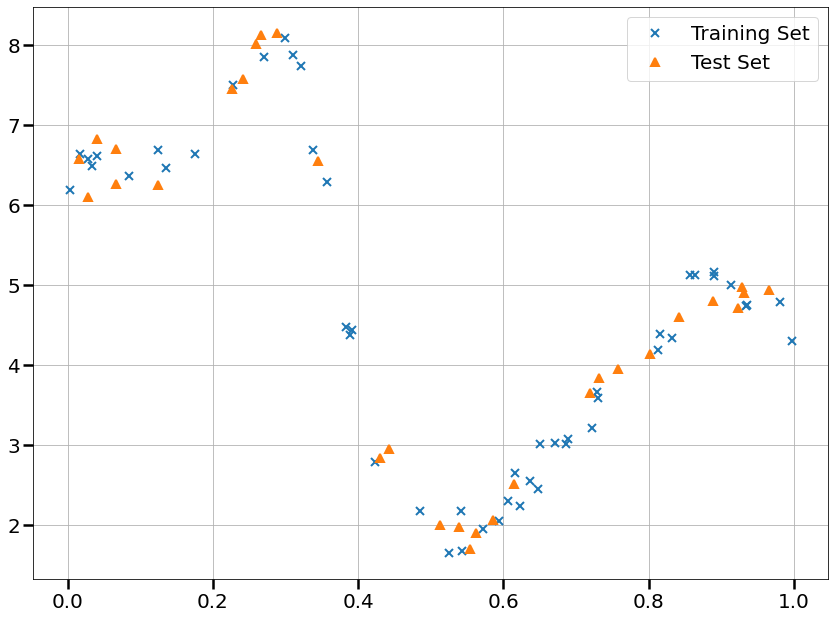

In [4]:
training_set = pd.read_csv(data_dir + 'training-set.csv').to_numpy()
x_train, y_train = training_set[:,0], training_set[:,1]

test_set = pd.read_csv(data_dir + 'test-set.csv').to_numpy()
x_test, y_test = test_set[:,0], test_set[:,1]

plt.close('all')
plt.figure()
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Run your experiments from here on!

**Defenition of some functions for Task 1**

In [5]:
#Compute the MSE of the given coefficents p

def MSE(p,x,y):
        """Computing the 1D-MSE, given the polynomial coefficents p, the places x and the data y  """
        y_hat = np.polyval(p,x) 
        error = (y_hat-y)**2    
        mse = np.mean(error)
        return mse
    
    
# Evaluate the polynomial model
    
def PolyModelEval(order, x_fit, y_fit, x):
        """Evaluate the poly model, fited to the data [x_fit, y_fit] at x"""
        p = np.polyfit(x_fit, y_fit, order, full=False)
        y_hat = np.polyval(p,x)
        return y_hat
    
# For RBF linear least squares solution

def RbfOptimizer(P, w, x):
        """Compute the matrix A for finding the linear least squares solution based on the data x."""
        rbf_center = np.arange(0,1,1/P)
        A = np.ones([np.size(x), P])
        
        for i in range(0,np.size(x)):
            for j in range(1,P):
                A[i,j] = e**(-(x[i]-rbf_center[j])**2/w)
        return A
    

<hr style='border:2.2px solid Black'></hr>

**Task a)** Find a suitable polynomial model using the test set.

In [6]:
#First test just with polyfit

P_max = 25
residuals_train = np.zeros(P_max-1)
residuals_test = np.zeros(P_max-1)

for order in range(1,P_max):
    
    p = np.polyfit(x_train, y_train, order, full=False)
    residuals_train[order-1] = MSE(p,x_train, y_train)
    residuals_test[order-1] = MSE(p,x_test, y_test)
    
train_min = np.where(residuals_train == np.amin(residuals_train)) #optimal order
test_min = np.where(residuals_test == np.amin(residuals_test))    #optimal order


Visual inspection of the results:

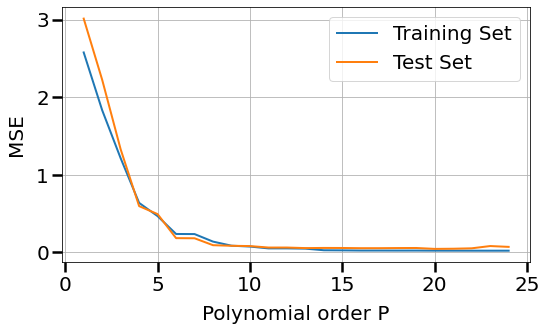

Optimal polynomial order for training set:  [23] with MSE:  [0.02241836]
Optimal polynomial order for test set:  [20] with MSE:  [0.04568998]


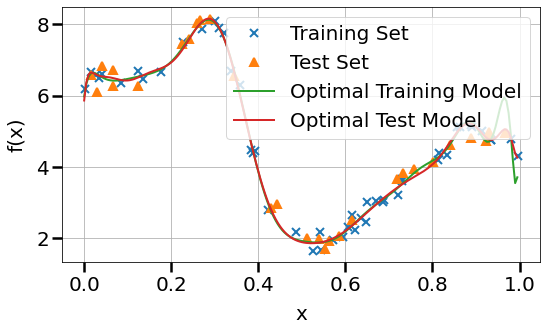

In [7]:
#Plot of MSE for train and test

plt.figure(figsize=(8,5))
plt.plot(np.arange(1,P_max),residuals_train, label='Training Set')
plt.plot(np.arange(1,P_max), residuals_test, label='Test Set')
plt.legend()
plt.xlabel('Polynomial order P')
plt.ylabel('MSE')
plt.grid()
plt.tight_layout()
plt.show()

print('Optimal polynomial order for training set: ', train_min[0]+1, 'with MSE: ', residuals_train[train_min[0]])
print('Optimal polynomial order for test set: ', test_min[0]+1, 'with MSE: ', residuals_test[test_min[0]])

#Plot the optimal model with training/test set

x_eval = np.arange(0,1,0.005)
opt_train_model = PolyModelEval(train_min[0]+1, x_train, y_train, x_eval)
opt_test_model = PolyModelEval(test_min[0]+1, x_train, y_train, x_eval)

plt.figure(figsize=(8,5))
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.plot(x_eval, opt_train_model, label='Optimal Training Model')
plt.plot(x_eval, opt_test_model, label='Optimal Test Model')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<hr style='border:2.2px solid Black'></hr>

**Task b)** Use a subset of the original training set as validation set. Training and validation set must be disjoint.

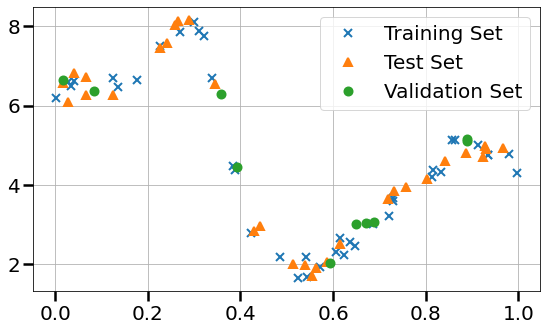

In [8]:
TV_ratio = 0.2 #Define splitting ratio btw. training and validation set, in [0,1]

N_sample = size(x_train)
Val_size = np.ceil(N_sample*TV_ratio)

rng = default_rng(4) #seed value set!!!
pos = rng.choice(N_sample,Val_size.astype(int), replace=False) #Draw non-repetitive random numbers

x_validation = x_train[pos]
y_validation = y_train[pos]

x_train2 = np.delete(x_train, pos)
y_train2 = np.delete(y_train, pos)

# Plot the splitted data-set
plt.figure(figsize=(8,5))
plt.plot(x_train2, y_train2, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.plot(x_validation, y_validation, 'o', label='Validation Set')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Evaluation based on validation set performance:

In [9]:
P_max = 30

residuals_validation = np.zeros(P_max-1)
residuals_train = np.zeros(P_max-1)
residuals_test = np.zeros(P_max-1)

for order in range(1,P_max):
    
    p = np.polyfit(x_train2, y_train2, order, full=False)
    residuals_train[order-1] = MSE(p,x_train2, y_train2)
    residuals_validation[order-1] = MSE(p,x_validation, y_validation)
    residuals_test[order-1] = MSE(p,x_test, y_test)
    
validation_min = np.where(residuals_validation == np.amin(residuals_validation)) #optimal order
test_min = np.where(residuals_test == np.amin(residuals_test))

print('Optimal polynomial order for validation set: ', validation_min[0]+1, 'with MSE: ', residuals_validation[validation_min[0]])
print('Optimal polynomial order for test set: ', test_min[0]+1, 'with MSE: ', residuals_test[test_min[0]])

Optimal polynomial order for validation set:  [10] with MSE:  [0.02819958]
Optimal polynomial order for test set:  [19] with MSE:  [0.05755207]


Visual inspection of the results:

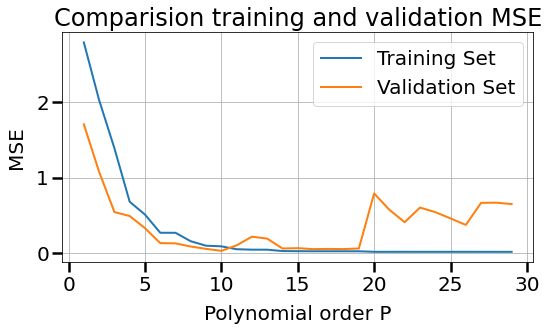

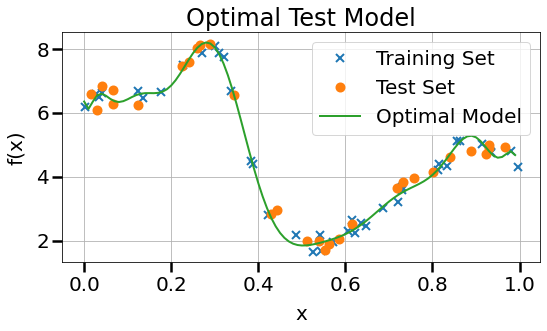

In [10]:
#Plot the training and validation MSE curve

plt.close('all')
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,P_max),residuals_train, label='Training Set')
plt.plot(np.arange(1,P_max), residuals_validation, label='Validation Set')
plt.xlabel('Polynomial order P')
plt.ylabel('MSE')
plt.title('Comparision training and validation MSE')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

#Plot of the optimal model based on test set

x_eval = np.arange(0,1,0.01)
y_opt_model = PolyModelEval(test_min[0]+1, x_train2, y_train2, x_eval)

plt.figure(figsize=(8,5))
plt.plot(x_train2, y_train2, 'x', label='Training Set')
plt.plot(x_test, y_test, 'o', label='Test Set')
plt.plot(x_eval, y_opt_model, label='Optimal Model')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Optimal Test Model')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

&ensp;
<hr style='border:2.2px solid Black'></hr>

**Task c)** Use a Gaussian radial basis ($RBF$) function model $\hat{f}$

$\hat{f}(x) = \alpha_0 + \sum_{p=1}^{P} \alpha_p e^{\frac{-(x-c_p)^2}{2\omega_p^2}}$

To avoid the nonlinearity, the centers of the P $RBF$ are choosen evenly spaced on the support of the given data.

The coefficent vector $c_{opt}$ is determined by means of minimizing the MSE for thge given model oder P:

$
c_{opt} = (A^TA)^{-1} \cdot A^T y_{train}
$

Where $A$ is defined as:
&ensp;

$
A = \begin{bmatrix}
1 & e^{\frac{-(x[0]-c_1)^2}{2\omega^2}} & e^{\frac{-(x[1]-c_1)^2}{2\omega^2}} & \dots & e^{\frac{-(x[N]-c_1)^2}{2\omega^2}}\\
1 & e^{\frac{-(x[0]-c_2)^2}{2\omega^2}} & e^{\frac{-(x[1]-c_2)^2}{2\omega^2}} & \dots & e^{\frac{-(x[N]-c_2)^2}{2\omega^2}}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & e^{\frac{-(x[0]-c_P)^2}{2\omega^2}} & e^{\frac{-(x[1]-c_P)^2}{2\omega^2}} & \dots &  e^{\frac{-(x[N]-c_P)^2}{2\omega^2}}
\end{bmatrix}
$

&ensp;
&ensp;
&ensp;
&ensp;

MSE on test set:  0.04439075617460967


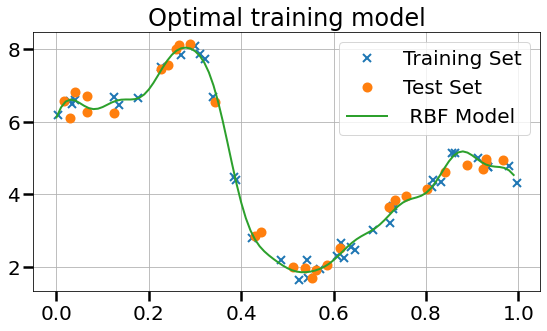

In [11]:
P = 20 #number of RBF's

rbf_center = np.arange(0,1,1/P)
w2 = (2/P)**2 #width parameter sqared

A = RbfOptimizer(P, w2, x_train)     
c_opt = np.linalg.pinv(A).dot(y_train)

#Evaluate the model with test set

y_hat = RbfOptimizer(P, w2, x_test).dot(c_opt)  #for MSE compuation
mse = np.mean((y_hat-y_test)**2)  

print('MSE on test set: ', mse)

x_eval = np.arange(0,1,0.01)
y_eval = RbfOptimizer(P, w2, x_eval).dot(c_opt) #for plot

#Plot the model for the selected model order P

plt.figure(figsize=(8,5))
plt.plot(x_train2, y_train2, 'x', label = 'Training Set')
plt.plot(x_test, y_test, 'o', label='Test Set')
plt.plot(x_eval, y_eval, label = ' RBF Model')
plt.title('Optimal training model')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Optimal RBF order for test set:  [20] with MSE:  [[0.04439076]]


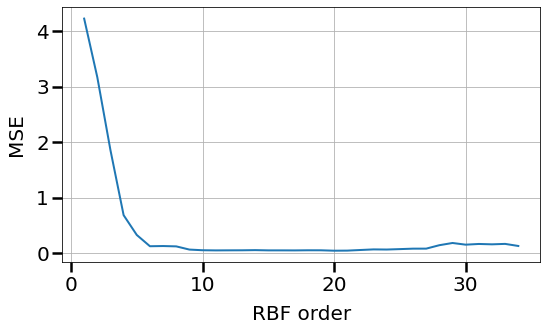

In [12]:
#Just some code to find the optimal model order P, not asked!
P = 35 #number of RBF's

mse = np.zeros([P-1,1])

for order in range(1,P):
    
    w2 = (2/order)**2                    #width parameter sqared
    rbf_center = np.arange(0,1,1/order)  #RBF centers
    
    A = RbfOptimizer(order, w2, x_train)     
    c_opt = np.linalg.pinv(A).dot(y_train)
    
    y_hat = RbfOptimizer(order, w2, x_test).dot(c_opt)
    mse[order-1] = np.mean((y_hat-y_test)**2)  
    
mse_min = np.where(mse == np.amin(mse)) #optimal order
print('Optimal RBF order for test set: ', mse_min[0]+1, 'with MSE: ', mse[mse_min[0]])

plt.figure(figsize=(8,5))
plt.plot(np.arange(1,P,1), mse)
plt.xlabel('RBF order')
plt.ylabel('MSE')
plt.grid()
plt.tight_layout()


&ensp;

<hr style='border:2.2px solid Black'></hr>

**Task d)** Learn the optimal centers and widths using gradient descent (GD) applyed on a RBF-NN. 